In [1]:
from datetime import datetime, timedelta 
import pandas as pd
from utils import simulator_period,save_sim_resuls
from subjects.corr_coef import CorrCoeff,TrendFunc

In [2]:
start_date = datetime.strptime("01/1/2022", "%d/%m/%Y")
end_date = datetime.strptime("01/1/2025", "%d/%m/%Y")


In [3]:
from subjects.corr_coef import LotteryFig,LotteryCoeff,LotteryScheldure
lottery_scheldure =LotteryScheldure()

In [4]:
start_lottery_date =  datetime.strptime("07/7/2024", "%d/%m/%Y") 
end_lottery_date =  end_date

In [5]:
lottery_am = (end_date-start_lottery_date).days//7
lottery_scheldure =LotteryScheldure()
for curr_lottery_nn in range(lottery_am):
    lottery_day = start_lottery_date + timedelta(days = curr_lottery_nn *7)
    lottery_scheldure.lottery_list.append(LotteryCoeff(lottery_fig = LotteryFig(day_lottery = lottery_day )))


In [6]:
casino_fig, plr_pool = simulator_period(start_date,end_date,trend_func = TrendFunc.make_trend_dict_line,lottery_scheldure = lottery_scheldure)
save_sim_resuls(casino_fig, plr_pool,casino_fig_file_name = 'casino_fig_lottery.csv', plr_pool_file_name = "plr_pool__lottery")

In [7]:
prl_pool_df=pd.read_csv('plr_pool__lottery.csv', parse_dates = ['last_visit'])


In [8]:
prl_pool_df.head()

,id,visits,last_visit,res_sum,res_std,res_mean,hands_sum,hands_std,hands_mean,bets_sum,bets_std,bets_mean
0,519,176,2024-12-29,-3069.861647,89.199062,-17.442396,11948.0,11.668169,67.886364,1.177166e+05,114.959547,668.844046
1,263,311,2024-12-31,-31341.270833,234.198488,-100.775790,119126.0,38.894633,383.041801,1.201648e+06,392.337871,3863.818566
2,783,189,2025-01-01,8039.526085,461.131400,42.537175,19072.0,15.808957,100.910053,6.801596e+05,563.790572,3598.727978
3,531,89,2024-12-21,-259.096942,88.065432,-2.911202,5530.0,12.543131,62.134831,5.656828e+04,128.308013,635.598619
4,790,122,2024-12-31,-10818.037827,233.022538,-88.672441,50076.0,39.301305,410.459016,4.922838e+05,386.360666,4035.113296


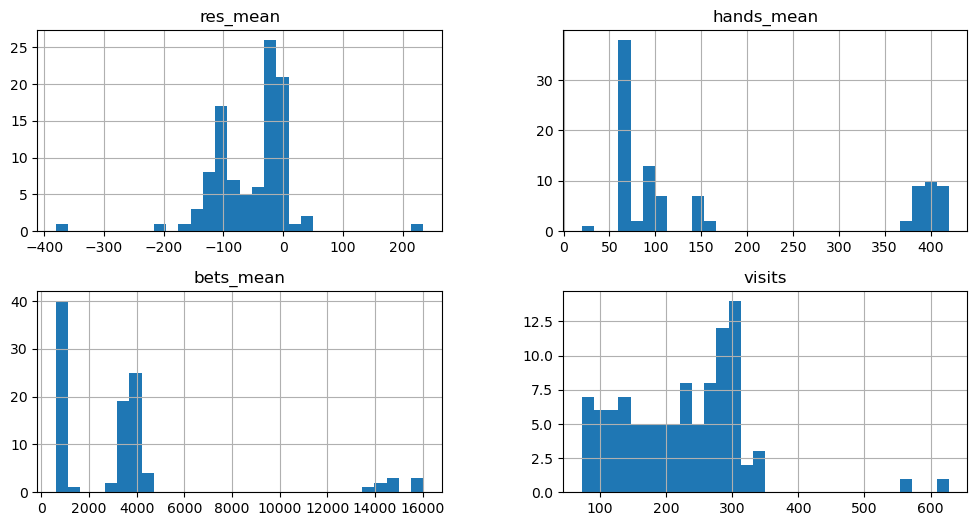

In [9]:
prl_pool_df[['res_mean','hands_mean','bets_mean', 'visits']].hist(figsize=(12,6), bins=30);

In [10]:
casino_fig.head()

,Date,Heads,Day_Result,Total_Bets,Total_Hands
0,2022-01-01,25,495.469207,60883.353144,4592
1,2022-01-02,15,2977.849335,53199.584246,4428
2,2022-01-03,8,1103.594063,16713.174979,1367
3,2022-01-04,13,108.231412,9815.434562,735
4,2022-01-05,10,1815.418092,29247.440944,2031


<Axes: xlabel='Date'>

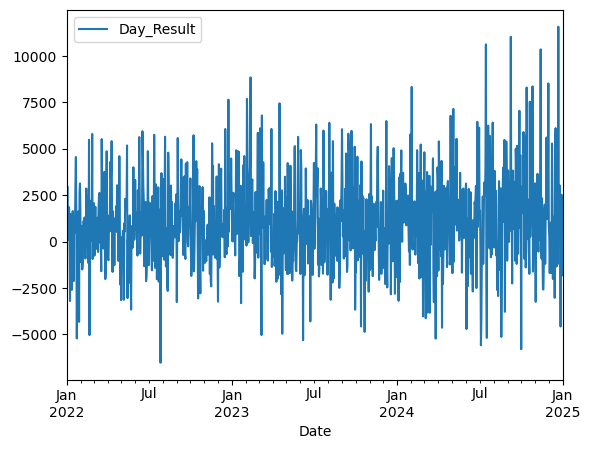

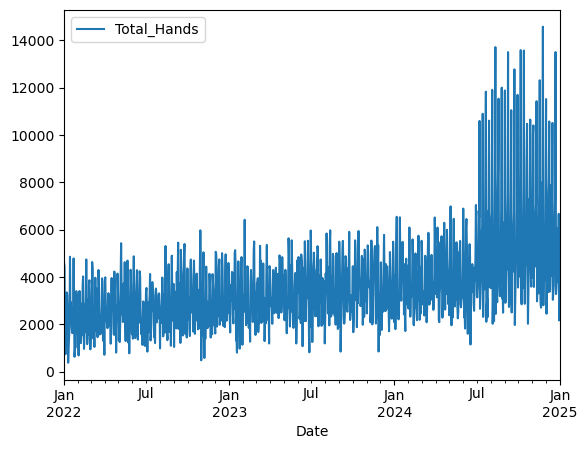

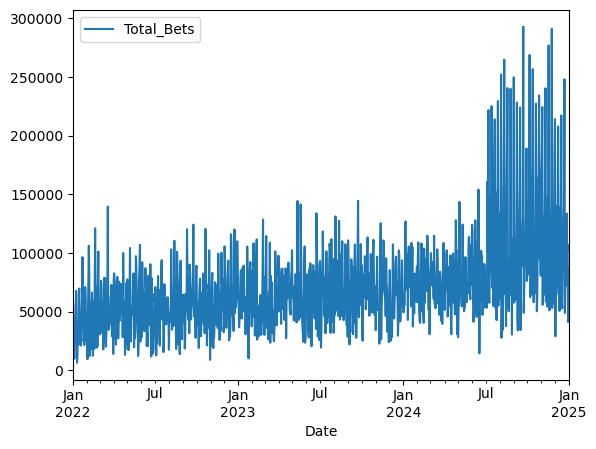

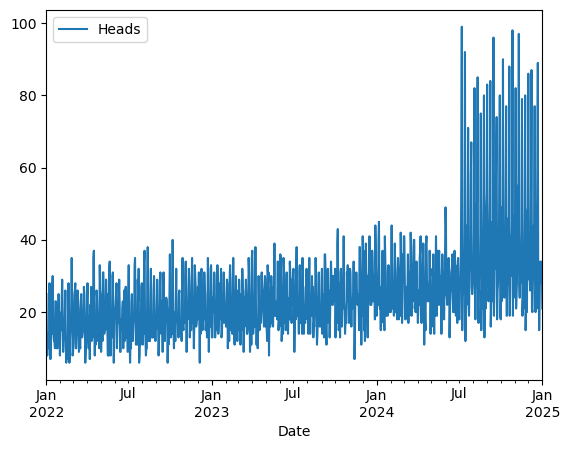

In [11]:
casino_fig[:].plot(x="Date", y ="Day_Result")
casino_fig[:].plot(x="Date", y ="Total_Hands")
casino_fig[:].plot(x="Date", y ="Total_Bets")
casino_fig[:].plot(x="Date", y ="Heads")


In [12]:
casino_fig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1097 non-null   datetime64[ns]
 1   Heads        1097 non-null   int64         
 2   Day_Result   1097 non-null   float64       
 3   Total_Bets   1097 non-null   float64       
 4   Total_Hands  1097 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 43.0 KB


In [13]:
prl_pool_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          100 non-null    int64         
 1   visits      100 non-null    int64         
 2   last_visit  100 non-null    datetime64[ns]
 3   res_sum     100 non-null    float64       
 4   res_std     100 non-null    float64       
 5   res_mean    100 non-null    float64       
 6   hands_sum   100 non-null    float64       
 7   hands_std   100 non-null    float64       
 8   hands_mean  100 non-null    float64       
 9   bets_sum    100 non-null    float64       
 10  bets_std    100 non-null    float64       
 11  bets_mean   100 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 9.5 KB
